In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#read in all csv data files
fertility_df = pd.read_csv("Resources/Fertility.csv")
gdp_df = pd.read_csv("Resources/GDP per capita.csv")
life_expec_df = pd.read_csv("Resources/Life expectancy.csv")
happiness_df = pd.read_csv("Resources/Happiness.csv")
meat_df = pd.read_csv("Resources/Meat consumption.csv")
median_age_df = pd.read_csv("Resources/Median age.csv")
pop_growth_df = pd.read_csv("Resources/Population growth.csv")
sex_df = pd.read_csv("Resources/Sex-ratio.csv")
suicide_df = pd.read_csv("Resources/Suicide rate.csv")
urban_df = pd.read_csv("Resources/Urbanization rate.csv")

In [3]:
#merge data into one dataframe
fg_df = pd.merge(fertility_df,gdp_df, on='Country', how="outer")
fgl_df= pd.merge(fg_df, life_expec_df, on='Country', how="outer")
fglm_df = pd.merge(fgl_df, meat_df, on='Country', how="outer")
fglmm_df = pd.merge(fglm_df, median_age_df, on='Country', how="outer")
fglmmp_df = pd.merge(fglmm_df,pop_growth_df, on='Country', how="outer")
fglmmps_df = pd.merge(fglmmp_df,sex_df, on='Country', how="outer")
fglmmpss_df = pd.merge(fglmmps_df, suicide_df,on='Country', how="outer")
world_data = pd.merge(fglmmpss_df,urban_df,on='Country', how="outer")

C:\Users\Viola\AppData\Local\Temp/ipykernel_18752/1356300611.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ISO-code_x'} in the result is deprecated and will raise a MergeError in a future version.
  fglm_df = pd.merge(fgl_df, meat_df, on='Country', how="outer")
C:\Users\Viola\AppData\Local\Temp/ipykernel_18752/1356300611.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ISO-code_x'} in the result is deprecated and will raise a MergeError in a future version.
  fglmmp_df = pd.merge(fglmm_df,pop_growth_df, on='Country', how="outer")
C:\Users\Viola\AppData\Local\Temp/ipykernel_18752/1356300611.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ISO-code_x'} in the result is deprecated and will raise a MergeError in a future version.
  fglmmpss_df = pd.merge(fglmmps_df, suicide_df,on='Country', how="outer")


In [4]:
#delete duplicate columns
del world_data ["ISO-code_x"]
del world_data ["ISO-code_y"]

In [5]:
world_data.head()

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code
0,Afghanistan,4.5,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0,AFG
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB
2,Algeria,3.0,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7,DZA
3,Andorra,1.3,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,AND
4,Angola,5.5,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,AGO


In [6]:
happiness_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [7]:
happiness1_df = happiness_df.rename(columns={"Country name":"Country",
                                             "Ladder score":"Happiness Score"})
new_df = happiness1_df[["Country","Regional indicator","Happiness Score"]]
world_data = pd.merge(world_data,new_df, on='Country', how="outer")
world_data.head()

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
0,Afghanistan,4.5,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0,AFG,South Asia,2.5669
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB,Central and Eastern Europe,4.8827
2,Algeria,3.0,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7,DZA,Middle East and North Africa,5.0051
3,Andorra,1.3,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,AND,NaN,NaN
4,Angola,5.5,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,AGO,NaN,NaN


In [8]:
#Using isnull() to select all rows with NaN under an entire DataFrame:
world_data[world_data.isnull().any(axis=1)]

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB,Central and Eastern Europe,4.8827
3,Andorra,1.3,NaN,81.8,NaN,44.3,0.63,1.06,NaN,87.9,AND,NaN,NaN
4,Angola,5.5,6763.0,60.8,19.0,15.9,3.12,0.95,8.9,66.8,AGO,NaN,NaN
5,Antigua and Barbuda,2.0,30593.0,76.9,56.0,31.9,1.03,0.89,0.5,24.4,ATG,NaN,NaN
8,Aruba,1.9,NaN,NaN,NaN,39.3,0.44,0.90,NaN,43.7,ABW,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,Macedonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central and Eastern Europe,5.1598
750,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.7506
751,Palestinian Territories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East and North Africa,4.5528
752,Congo (Kinshasa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,4.3110


In [9]:
world_data.head(70)

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
0,Afghanistan,4.5,2182.0,64.50,17.3,27.4,2.41,1.03,6.4,26.0,AFG,South Asia,2.5669
1,Albania,1.6,14866.0,NaN,NaN,32.9,0.26,0.98,5.6,62.1,ALB,Central and Eastern Europe,4.8827
2,Algeria,3.0,16091.0,76.70,18.3,28.1,1.89,1.03,3.3,73.7,DZA,Middle East and North Africa,5.0051
3,Andorra,1.3,NaN,81.80,NaN,44.3,0.63,1.06,NaN,87.9,AND,NaN,NaN
4,Angola,5.5,6763.0,60.80,19.0,15.9,3.12,0.95,8.9,66.8,AGO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Georgia,2.1,13200.0,73.60,26.0,38.1,0.63,0.92,6.7,59.5,GEO,Commonwealth of Independent States,4.6726
66,Germany,1.6,55306.0,81.20,82.1,47.1,0.11,0.96,9.1,77.5,DEU,Western Europe,7.0758
67,Ghana,3.9,7343.0,63.80,9.9,21.1,2.17,0.97,8.7,57.3,GHA,Sub-Saharan Africa,5.1480
68,Greece,1.4,31616.0,82.10,78.7,44.5,-0.18,0.95,3.8,79.7,GRC,Western Europe,5.5150


In [10]:
#Just to see the unique record count 
world_data["Country"].count()

754

In [11]:
#identify columns with missing data
print(world_data.isna().sum())

Country                0
Fertility             42
GDP per capita        52
Life expectancy       58
Meat consumption      55
Median age            19
Population growth     36
Sex-ratio             17
Suicide rate          61
Urbanization rate     25
ISO-code              25
Regional indicator    89
Happiness Score       89
dtype: int64


In [12]:
world_data.dropna(axis=0, how='any', inplace=True)

In [13]:
print(world_data.isna().sum())

Country               0
Fertility             0
GDP per capita        0
Life expectancy       0
Meat consumption      0
Median age            0
Population growth     0
Sex-ratio             0
Suicide rate          0
Urbanization rate     0
ISO-code              0
Regional indicator    0
Happiness Score       0
dtype: int64


In [14]:
world_data.dtypes

Country                object
Fertility             float64
GDP per capita        float64
Life expectancy       float64
Meat consumption      float64
Median age            float64
Population growth     float64
Sex-ratio             float64
Suicide rate          float64
Urbanization rate     float64
ISO-code               object
Regional indicator     object
Happiness Score       float64
dtype: object

In [15]:
world_data.describe()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness Score
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,4.191981,6611.704334,62.309598,17.145666,21.713313,2.244644,0.979133,9.205418,44.655263,5.059463
std,0.977358,13054.499377,6.534061,21.776132,5.988856,0.675905,0.073579,2.888725,13.608921,0.562847
min,1.100000,724.000000,52.800000,3.100000,15.400000,-1.600000,0.860000,2.000000,13.700000,2.566900
25%,4.500000,2113.000000,58.000000,6.500000,18.900000,2.390000,0.950000,7.400000,36.500000,4.949300
50%,4.500000,2574.000000,61.200000,13.000000,20.100000,2.390000,0.980000,9.450000,44.200000,4.949300
75%,4.700000,2574.000000,61.200000,13.000000,20.100000,2.560000,1.000000,10.500000,44.200000,4.949300
max,5.900000,112045.000000,84.500000,145.900000,47.300000,4.300000,2.560000,28.900000,100.000000,7.808700


In [16]:
world_data.corr()

,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,Happiness Score
Fertility,1.000000,-0.801351,-0.928797,-0.805337,-0.930296,0.883299,-0.109433,-0.084340,-0.773968,-0.667571
GDP per capita,-0.801351,1.000000,0.823358,0.867386,0.832114,-0.650818,0.225384,0.102677,0.777596,0.771061
Life expectancy,-0.928797,0.823358,1.000000,0.823379,0.892455,-0.796093,0.114276,0.007724,0.784391,0.697370
Meat consumption,-0.805337,0.867386,0.823379,1.000000,0.838589,-0.711913,0.116712,0.099648,0.790669,0.758547
Median age,-0.930296,0.832114,0.892455,0.838589,1.000000,-0.916091,0.020662,0.161118,0.755451,0.707219
Population growth,0.883299,-0.650818,-0.796093,-0.711913,-0.916091,1.000000,0.113507,-0.207344,-0.672858,-0.591497
Sex-ratio,-0.109433,0.225384,0.114276,0.116712,0.020662,0.113507,1.000000,-0.209017,0.161547,0.118294
Suicide rate,-0.084340,0.102677,0.007724,0.099648,0.161118,-0.207344,-0.209017,1.000000,0.038985,0.004744
Urbanization rate,-0.773968,0.777596,0.784391,0.790669,0.755451,-0.672858,0.161547,0.038985,1.000000,0.703193
Happiness Score,-0.667571,0.771061,0.697370,0.758547,0.707219,-0.591497,0.118294,0.004744,0.703193,1.000000


In [17]:
#1st relationship. Meat consumption vs Life Expectancy
#2st relationship. Meat consumption vs Urbanization Rate
#3rd relationship. Meat consumption vs Happiness Score
#4th relationship. Fertility vs Population growth
#5th relationship. Urbanization vs 


## Meat consumption vs Happiness Score

In [18]:
world_data.head()

,Country,Fertility,GDP per capita,Life expectancy,Meat consumption,Median age,Population growth,Sex-ratio,Suicide rate,Urbanization rate,ISO-code,Regional indicator,Happiness Score
0,Afghanistan,4.5,2182.0,64.5,17.3,27.4,2.41,1.03,6.4,26.0,AFG,South Asia,2.5669
2,Algeria,3.0,16091.0,76.7,18.3,28.1,1.89,1.03,3.3,73.7,DZA,Middle East and North Africa,5.0051
6,Argentina,2.3,19971.0,76.5,79.7,31.7,0.88,0.98,9.1,92.1,ARG,Latin America and Caribbean,5.9747
7,Armenia,1.8,11845.0,74.9,27.7,35.1,0.17,0.95,5.7,63.3,ARM,Commonwealth of Independent States,4.6768
9,Australia,1.7,54799.0,83.3,108.2,38.7,1.60,0.99,11.7,86.2,AUS,North America and ANZ,7.2228


Bar and Pie Charts

In [19]:
# Get New DataFrame Groupby Regional Indicator
meat = world_data.groupby(['Regional indicator']).sum()["Meat consumption"]
happiness = world_data.groupby(['Regional indicator']).mean()["Happiness Score"]
region_df = meat.to_frame().join(happiness).rename(columns={'Meat consumption':'Total Meat consumption',
                                                            'Happiness Score':'Average Happiness Score'})
region_df

,Total Meat consumption,Average Happiness Score
Regional indicator,,
Central and Eastern Europe,701.9,6.004755
Commonwealth of Independent States,440.1,5.372777
East Asia,207.1,5.483633
Latin America and Caribbean,1023.4,5.981786
Middle East and North Africa,570.5,5.213787
North America and ANZ,483.2,7.173525
South Asia,54.5,4.355083
Southeast Asia,246.8,5.517788
Sub-Saharan Africa,5535.4,4.911144


Text(0.5, 1.0, 'Average Happiness Score for Different Regions')

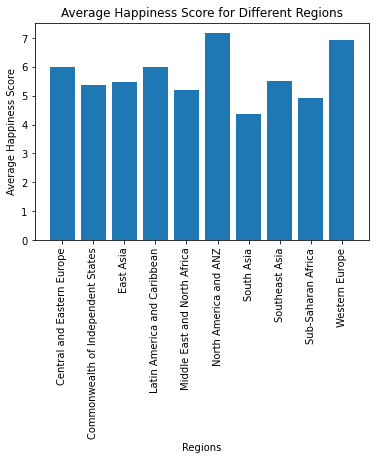

In [20]:
# Generate a bar plot showing the average happiness score for different regions using pyplot.
x_axis = region_df.index.values
plt.bar(x_axis, region_df['Average Happiness Score'])                
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Regions")
plt.ylabel("Average Happiness Score")
plt.title('Average Happiness Score for Different Regions')

Quartiles, Outliers and Boxplots

In [21]:
regions_lt = region_df.index.values
happiness_lt = []

for x in regions_lt:    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    loc_df = world_data.loc[world_data['Regional indicator'] == x]
    
    # add subset 
    values = loc_df['Happiness Score']
    happiness_lt.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {x}: {iqr}')
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')
    
    outliers_count = (values.loc[(loc_df['Happiness Score'] >= upper_bound) | 
                                 (loc_df['Happiness Score'] <= lower_bound)]).count()
    print(f'Number of {x} outliers: {outliers_count}')
   

IQR for Central and Eastern Europe: 0.3888499739999993
Lower Bound for Central and Eastern Europe: 5.228774904500002
Upper Bound for Central and Eastern Europe: 6.784174800499999
Number of Central and Eastern Europe outliers: 2
IQR for Commonwealth of Independent States: 0.4365997309999994
Lower Bound for Commonwealth of Independent States: 4.464200497500001
Upper Bound for Commonwealth of Independent States: 6.210599421499999
Number of Commonwealth of Independent States outliers: 1
IQR for East Asia: 0.37345004049999986
Lower Bound for East Asia: 4.72987496925
Upper Bound for East Asia: 6.223675131249999
Number of East Asia outliers: 0
IQR for Latin America and Caribbean: 0.5514998430000002
Lower Bound for Latin America and Caribbean: 4.9695503725
Upper Bound for Latin America and Caribbean: 7.1755497445000005
Number of Latin America and Caribbean outliers: 1
IQR for Middle East and North Africa: 1.2051501275000005
Lower Bound for Middle East and North Africa: 2.8451747892499992
Upper

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Central and Eastern Europe'),
  Text(1, 0, 'Commonwealth of Independent States'),
  Text(2, 0, 'East Asia'),
  Text(3, 0, 'Latin America and Caribbean'),
  Text(4, 0, 'Middle East and North Africa'),
  Text(5, 0, 'North America and ANZ'),
  Text(6, 0, 'South Asia'),
  Text(7, 0, 'Southeast Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Western Europe')])

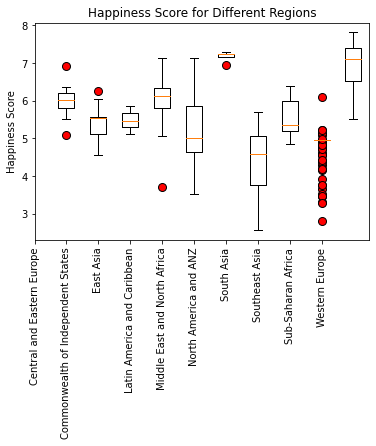

In [22]:
# Generate a box plot
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(happiness_lt, flierprops=flierprops)

plt.title('Happiness Score for Different Regions')
plt.ylabel('Happiness Score')
plt.xticks([0,1,2,3,4,5,6,7,8,9],regions_lt)
plt.xticks(rotation=90)

Correlation and Regression

The correlation coefficient for world meat consumption and happiness score is 0.758547087185091.


Text(0.5, 1.0, 'Meat Consumption vs. Happiness Score in the World with Regression Line')

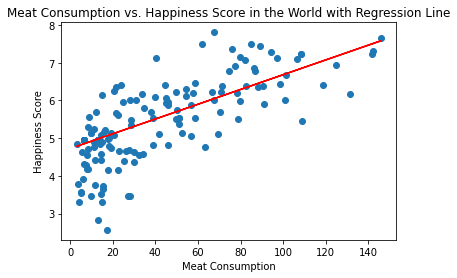

In [23]:
# Calculate the correlation coefficient and linear regression model 
x = world_data['Meat consumption']
y = world_data['Happiness Score']
# Correlation coefficient
correlation = st.pearsonr(x,y)
print(f'The correlation coefficient for world meat consumption and happiness score is {correlation[0]}.')

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

plt.xlabel("Meat Consumption")
plt.ylabel("Happiness Score")
plt.title('Meat Consumption vs. Happiness Score in the World with Regression Line')